# Discovering Frequent Patterns in Big Data Using FSPGrowth Algorithm

***

## <a id='basicApproach'>Basic approach: Executing FSPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0: install pami repository

In [1]:
!pip install -U pami

#### Step 1: Import the FSPGrowth algorithm

In [1]:
from PAMI.georeferencedFrequentPattern.basic import FSPGrowth  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'transactional_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.
neighborFile='T10_utility_neighbour.txt'
seperator='\t'       

#### Step 3: Execute the FSPGrowth algorithm

In [3]:
obj = alg.FSPGrowth(iFile=inputFile, minSup=minimumSupportCount,nFile=neighborFile, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Frequent Spatial Patterns successfully generated using FSPGrowth


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.savePatterns(oFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 4603


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 35.76156497001648


In [8]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 605319168
Memory (USS): 566685696


# Advanced Tutorial on Implementing FSPGrowth Algorithm

***

#### Step 1: Import the FSPGrowth algorithm and pandas data frame

In [1]:
from PAMI.georeferencedFrequentPattern.basic import FSPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'transactional_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
neighborFile='T10_utility_neighbour.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FSPGrowth algorithm

#### Step 3: Execute the FSPGrowth algorithm using a for loop

In [3]:
algorithm = 'FSPGrowth'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.FSPGrowth('transactional_T10I4D100K.csv', minSup=minSupCount,nFile=neighborFile, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent Spatial Patterns successfully generated using FSPGrowth
Frequent Spatial Patterns successfully generated using FSPGrowth
Frequent Spatial Patterns successfully generated using FSPGrowth
Frequent Spatial Patterns successfully generated using FSPGrowth
Frequent Spatial Patterns successfully generated using FSPGrowth


In [4]:
print(result)

   algorithm  minSup  patterns    runtime     memory
0  FSPGrowth     100      4603  35.265882  606318592
1  FSPGrowth     150      2994  35.105762  607047680
2  FSPGrowth     200      2177  35.955468  607338496
3  FSPGrowth     250      1406  34.050695  607256576
4  FSPGrowth     300       950  32.790241  607064064


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

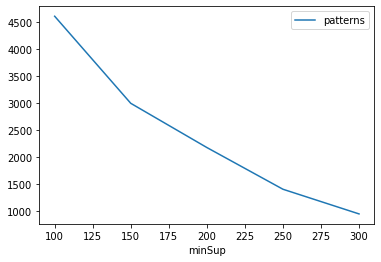

Graph for No Of Patterns is successfully generated!


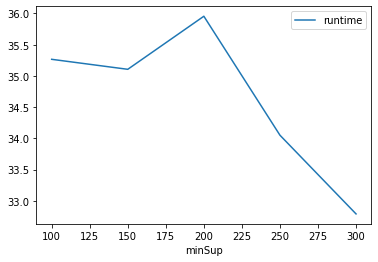

Graph for Runtime taken is successfully generated!


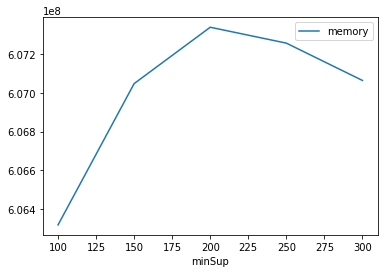

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
